# Exercício - Mini Projeto de Análise de Dados

Vamos fazer um exercício completo de pandas para um miniprojeto de análise de dados.

Esse exercício vai obrigar a gente a usar boa parte dos conhecimento de pandas e até de outros módulos que já aprendemos ao longo do curso.

### O que temos?

Temos os dados de 2019 de uma empresa de prestação de serviços. 

- CadastroFuncionarios
- CadastroClientes
- BaseServiçosPrestados

Obs1: Para ler arquivos csv, temos o read_csv<br>
Obs2: Para ler arquivos xlsx (arquivos em excel normais, que não são padrão csv), temos o read_excel

### O que queremos saber/fazer?

1. Valor Total da Folha Salarial -> Qual foi o gasto total com salários de funcionários pela empresa? <br>
    
    
2. Qual foi o faturamento da empresa?<br>
    
    
3. Qual o % de funcionários que já fechou algum contrato?<br>


4. Calcule o total de contratos que cada área da empresa já fechou


5. Calcule o total de funcionários por área


6. Qual o ticket médio mensal (faturamento médio mensal) dos contratos?<br>


In [1]:
import pandas as pd

In [2]:
funcionarios = pd.read_csv('CadastroFuncionarios.csv', sep=';')
display(funcionarios.head())
funcionarios.info()

,ID Funcionário,Estado Civil,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Cargo,Area
0,1,C,Gabriel Mesquita,21910,10955,4382,242,"719,04",Diretor,Operações
1,2,C,João Haddad,5404,2702,"1080,8",154,"574,56",Estagiário,Logística
2,3,C,Amanda Marques Ribeiro,16066,8033,"3213,2",154,"729,12",Estagiário,Administrativo
3,4,C,Guilherme Nunez,21305,"10652,5",4261,220,"524,16",Analista,Administrativo
4,5,C,Adelino Gomes,5098,2549,"1019,6",176,"725,76",Analista,Administrativo


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID Funcionário  114 non-null    int64 
 1   Estado Civil    114 non-null    object
 2   Nome Completo   114 non-null    object
 3   Salario Base    114 non-null    int64 
 4   Impostos        114 non-null    object
 5   Beneficios      114 non-null    object
 6   VT              114 non-null    int64 
 7   VR              114 non-null    object
 8   Cargo           114 non-null    object
 9   Area            114 non-null    object
dtypes: int64(3), object(7)
memory usage: 9.0+ KB


In [3]:
# Tratar a base de dados

funcionarios['Impostos'] = funcionarios['Impostos'].str.replace(',', '.')
funcionarios['Impostos'] = funcionarios['Impostos'].astype(float)
funcionarios['Beneficios'] = funcionarios['Beneficios'].str.replace(',', '.')
funcionarios['Beneficios'] = funcionarios['Beneficios'].astype(float)
funcionarios['VR'] = funcionarios['VR'].str.replace(',', '.')
funcionarios['VR'] = funcionarios['VR'].astype(float)

funcionarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID Funcionário  114 non-null    int64  
 1   Estado Civil    114 non-null    object 
 2   Nome Completo   114 non-null    object 
 3   Salario Base    114 non-null    int64  
 4   Impostos        114 non-null    float64
 5   Beneficios      114 non-null    float64
 6   VT              114 non-null    int64  
 7   VR              114 non-null    float64
 8   Cargo           114 non-null    object 
 9   Area            114 non-null    object 
dtypes: float64(3), int64(3), object(4)
memory usage: 9.0+ KB


In [4]:
clientes = pd.read_csv('CadastroClientes.csv', sep=';')
display(clientes.head())
clientes.info()

,ID Cliente,Cliente,Valor Contrato Mensal
0,1,Teixeira Gonçalves,540
1,2,Souza Santos,1260
2,3,Emídio Alves,3195
3,4,Santos Costa,2520
4,5,Do Monteiro,3510


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 3 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ID Cliente             320 non-null    int64 
 1   Cliente                320 non-null    object
 2   Valor Contrato Mensal  320 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 7.6+ KB


In [5]:
servicos = pd.read_excel('BaseServiçosPrestados.xlsx')
display(servicos.head())
servicos.info()

,Codigo do Servico,ID Funcionário,ID Cliente,Tempo Total de Contrato (Meses)
0,OS0001,67,1,14
1,OS0002,17,2,12
2,OS0003,116,4,14
3,OS0004,37,5,8
4,OS0005,130,6,8


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 237 entries, 0 to 236
Data columns (total 4 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Codigo do Servico                237 non-null    object
 1   ID Funcionário                   237 non-null    int64 
 2   ID Cliente                       237 non-null    int64 
 3   Tempo Total de Contrato (Meses)  237 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ KB


## Questão 1:

Valor Total da Folha Salarial -> Qual foi o gasto total com salários de funcionários pela empresa?

In [6]:
funcionarios['Gasto_total'] = funcionarios['Salario Base'] + funcionarios['Impostos'] + funcionarios['Beneficios'] + funcionarios['VT'] + funcionarios['VR']
folha_sal_total = funcionarios['Gasto_total'].sum()

print(f'O total da Folha Salarial é R$ {folha_sal_total:.2f}')

O total da Folha Salarial é R$ 2717493.22


## Questão 2:

Qual foi o faturamento da empresa?

In [7]:
# Fazer o merge entre os df de clientes e serviços

df_servicos = servicos.merge(clientes, on='ID Cliente')
df_servicos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 237 entries, 0 to 236
Data columns (total 6 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Codigo do Servico                237 non-null    object
 1   ID Funcionário                   237 non-null    int64 
 2   ID Cliente                       237 non-null    int64 
 3   Tempo Total de Contrato (Meses)  237 non-null    int64 
 4   Cliente                          237 non-null    object
 5   Valor Contrato Mensal            237 non-null    int64 
dtypes: int64(4), object(2)
memory usage: 13.0+ KB


In [8]:
# Calcular o valor total do contrato

df_servicos['Total Contrato'] = df_servicos['Tempo Total de Contrato (Meses)'] * df_servicos['Valor Contrato Mensal']
faturamento_total = df_servicos['Total Contrato'].sum()

print(f'O faturamento total da empresa é de R$ {faturamento_total:.2f}')

O faturamento total da empresa é de R$ 5519160.00


## Questão 3:

Qual o % de funcionários que já fechou algum contrato?

In [9]:
contrato_funcionarios = servicos.groupby('ID Funcionário')['Tempo Total de Contrato (Meses)'].agg('sum').reset_index()
contrato_funcionarios.head()

,ID Funcionário,Tempo Total de Contrato (Meses)
0,1,8
1,3,14
2,4,42
3,5,6
4,7,36


In [10]:
pcgt_funcionarios = len(contrato_funcionarios['ID Funcionário']) / len(funcionarios['ID Funcionário'])
print(f'A porcentagem de funcionários que já fechou algum contrato é {pcgt_funcionarios:.1%}')

A porcentagem de funcionários que já fechou algum contrato é 86.8%


## Questão 4:

Calcule o total de contratos que cada área da empresa já fechou

Administrativo    63
Operações         48
Comercial         44
Financeiro        42
Logística         40
Name: Area, dtype: int64

<Axes: >

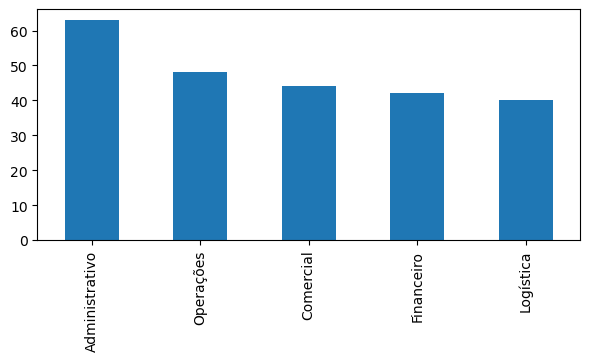

In [11]:
df_funcionarios = servicos[['ID Funcionário']].merge(funcionarios[['ID Funcionário', 'Area']])
qtde_area = df_funcionarios['Area'].value_counts()
display(qtde_area)
qtde_area.plot(kind='bar', figsize=(7, 3))

## Questão 5:

Calcule o total de funcionários por área

Administrativo    26
Comercial         26
Operações         23
Logística         21
Financeiro        18
Name: Area, dtype: int64

<Axes: >

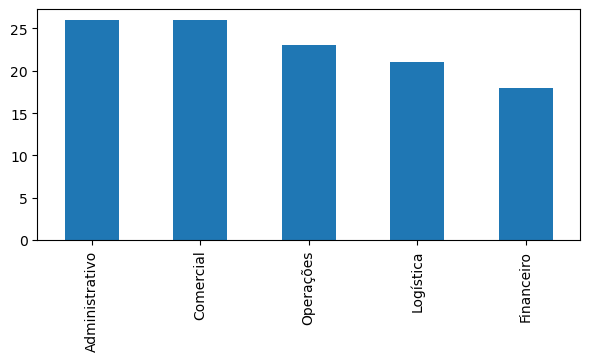

In [12]:
funcionarios_area = funcionarios['Area'].value_counts()
display(funcionarios_area)
funcionarios_area.plot(kind='bar', figsize=(7, 3))

## Questão 6:

Qual o ticket médio mensal (faturamento médio mensal) dos contratos?

In [13]:
ticket_medio = clientes['Valor Contrato Mensal'].mean()
print(f'O ticket médio mensal dos contratos é de R$ {ticket_medio:.2f}')

O ticket médio mensal dos contratos é de R$ 2502.56
